# Results

The current benchmark show consistent results in the two datasets.
The trend of benchmakr does not differ amongst the choice of atlases.
However, we can see variance within the parcellation scheme MIST and DiFuMo.
The variance comes from different resolution of the same parcellation scheme, epecially with low parcel counts.

<!-- new analysis: compare groups -->
<!-- new analysis: degree of freedom chart-->

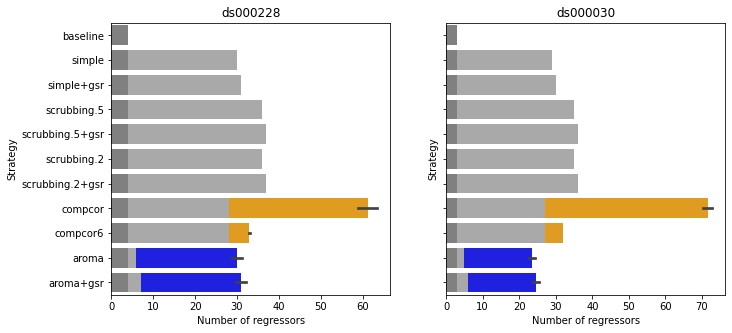

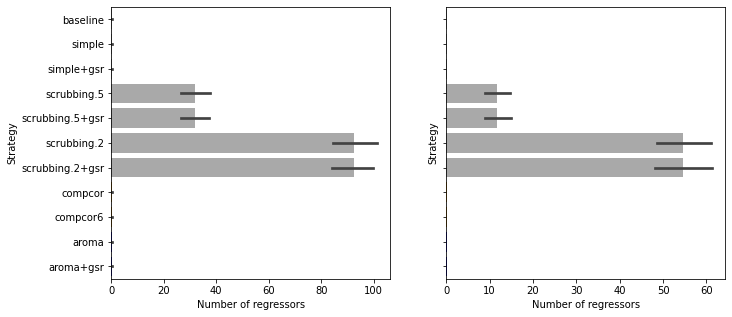

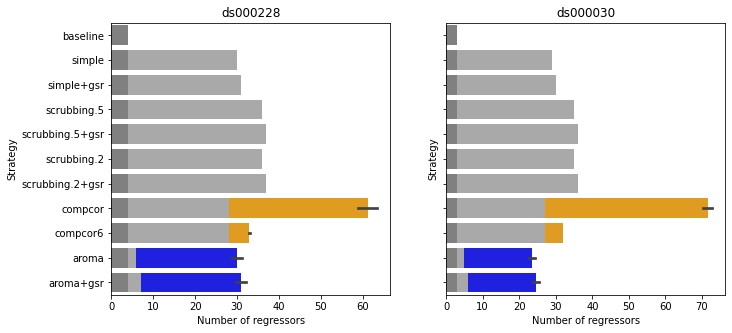

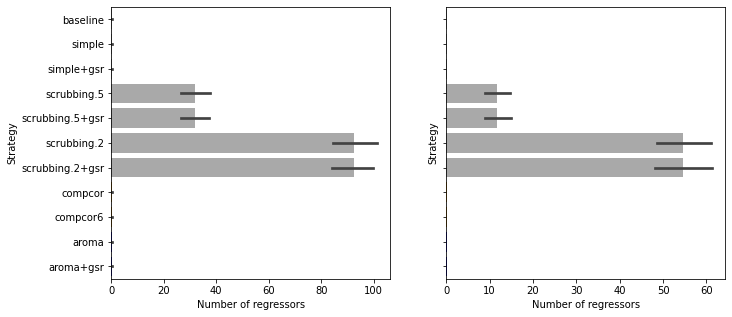

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from myst_nb import glue

palette = sns.color_palette("Paired", n_colors=12)[1:]

# Load metric data
datasets = ["ds000228", "ds000030"]
fig = plt.figure(figsize=(11, 5))
axs = fig.subplots(1, 2, sharey=True)
for i, dataset in enumerate(datasets):
    path_dof = f'../inputs/metrics/dataset-{dataset}_desc-confounds_phenotype.tsv'
    df_dof = pd.read_csv(path_dof, header=[0, 1], index_col=0, sep='\t')
    df_dof = df_dof.melt()
    df_dof.columns = ['Strategy', 'type', 'Number of regressors']
    sns.barplot(y='Strategy', x='Number of regressors', data=df_dof[df_dof['type']=='total'], ci=95, 
                palette=['darkgrey'] * 7+ ['orange', 'orange'] + ['blue', 'blue'], ax=axs[i])
    sns.barplot(y='Strategy', x='Number of regressors', data=df_dof[df_dof['type']=='fixed_regressors'], 
                color='darkgrey', ax=axs[i])
    sns.barplot(y='Strategy', x='Number of regressors', data=df_dof[df_dof['type']=='high_pass'], ax=axs[i], color='grey')
    axs[i].set_title(dataset)
glue("dof-fig", fig, display=False)


fig = plt.figure(figsize=(11, 5))
axs = fig.subplots(1, 2, sharey=True)
for i, dataset in enumerate(datasets):
    path_dof = f'../inputs/metrics/dataset-{dataset}_desc-confounds_phenotype.tsv'
    df_dof = pd.read_csv(path_dof, header=[0, 1], index_col=0, sep='\t')
    df_dof = df_dof.melt()
    df_dof.columns = ['Strategy', 'type', 'Number of regressors']
    sns.barplot(y='Strategy', x='Number of regressors', data=df_dof[df_dof['type']=='excised_vol'], ci=95, 
                palette=['darkgrey'] * 7+ ['orange', 'orange'] + ['blue', 'blue'], ax=axs[i])
glue("scrub-fig", fig, display=False)

```{glue:figure} dof-fig
:figwidth: 800px
:name: "tbl:dof-fig"

Degree of freedom
```


```{glue:figure} scrub-fig
:figwidth: 800px
:name: "tbl:scrub-fig"

Scrubbing
```

<!-- new analysis: direct compare mean FD between different groups -->